In [37]:
library(Synth)

In [38]:
data <- read.csv("final.csv")
data$adj_national_income <- as.numeric(data$adj_national_income)
# convert country to character
data$country <- as.character(data$country)
head(data)

id,country,year,gdp_per_capita,million_population,cpi,exchange_rate,land_area,tourism_expenditure,exports_percentage,labor_force,national_expenditure,capital_formulation,cfp,adj_national_income,trade_percentage,unemployment,urban_pop_percentage,urban_pop
1,Argentina,1986,3607.821,30.75760,-0.1,0.000094,2736690,9.738351,8.161978,1281793,98.16208,5.20e+10,17.46176,9.75e+10,14.48603,3.80,85.445,26272907
1,Argentina,1987,3559.219,31.21467,0.8,0.000214,2736690,11.651680,7.873206,13075206,99.70256,5.18e+10,19.55487,9.69e+10,15.44897,4.68,85.843,26797140
1,Argentina,1988,3982.444,31.67315,0.3,0.000875,2736690,13.905003,9.531613,13349351,96.68023,6.60e+10,18.64004,1.11e+11,15.74346,7.95,86.233,27327921
1,Argentina,1989,2382.561,32.12968,0.5,0.042334,2736690,16.011237,13.058409,13417468,93.52114,8.88e+10,15.51470,6.19e+10,19.63780,4.92,86.613,27859735
1,Argentina,1990,4330.959,32.58085,-0.6,0.487589,2736690,18.325249,10.359537,13631248,94.27178,9.01e+10,13.99698,1.20e+11,14.99086,5.23,86.984,28389540
1,Argentina,1991,5730.724,33.02855,-1.2,0.953554,2736690,20.057398,7.675043,13851438,98.40296,7.90e+10,14.63698,1.67e+11,13.75305,5.44,87.328,28910601


In [39]:
treated_unit <- "Australia"
control_units <- c("Argentina", "Brazil", "Denmark", "Japan", "Korea", "Malaysia", "Mexico", "New Zealand", "Singapore",
                    "South Africa", "Sweden", "Switzerland", "United Kingdom")
left_out <- c("cfp", "urban_pop_percentage")
dataprep.out <- 
            dataprep(foo = data,
            predictors = c("million_population", "cpi", 
                            "exchange_rate", "land_area", 
                            "tourism_expenditure", "exports_percentage", 
                            "labor_force", "national_expenditure", 
                            "capital_formulation", "adj_national_income", 
                            "trade_percentage", "unemployment", "urban_pop"),
            predictors.op = "mean",
            time.predictors.prior = 1986:2000,
            dependent = "gdp_per_capita",
            unit.variable = "id",
            unit.names.variable = "country",
            time.variable = "year",
            treatment.identifier = treated_unit,
            controls.identifier = control_units,
            time.optimize.ssr = 1986:2000,
            time.plot = 1986:2005
)

In [40]:
synth.out <- synth(data.prep.obj = dataprep.out)
synth.tables <- synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)
synth.tables$tab.w


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 3222359 

solution.v:
 0.073986 0.06775261 0.01429096 1.7186e-06 0.3630886 0.000482 0.004180713 0.3334852 0.0835402 0.000800805 0.0006780671 2e-09 0.05771303 

solution.w:
 0.002171736 0.001671174 0.003092406 0.001947963 0.006259084 0.003055172 0.00285659 0.5419349 0.001990451 0.004279422 0.007583261 0.01212482 0.411033 



,w.weights,unit.names,unit.numbers
1,0.002,Argentina,1
3,0.002,Brazil,3
4,0.003,Denmark,4
5,0.002,Japan,5
6,0.006,Korea,6
7,0.003,Malaysia,7
8,0.003,Mexico,8
9,0.542,New Zealand,9
10,0.002,Singapore,10
11,0.004,South Africa,11


In [41]:
synth.tables$tab.pred

,Treated,Synthetic,Sample Mean
million_population,1.760000e+01,2.718100e+01,4.566300e+01
cpi,4.123000e+00,5.320000e+00,6.161200e+01
exchange_rate,1.405000e+00,7.076000e+00,7.968200e+01
land_area,7.682300e+06,2.788047e+05,1.233402e+06
tourism_expenditure,1.003500e+01,1.018100e+01,7.584000e+00
exports_percentage,1.719800e+01,2.769100e+01,4.024900e+01
labor_force,8.783416e+06,1.356707e+07,2.060971e+07
national_expenditure,1.012830e+02,1.008800e+02,9.762700e+01
capital_formulation,3.903333e+10,4.055515e+10,1.660744e+11
adj_national_income,2.586000e+11,4.662206e+11,4.824979e+11


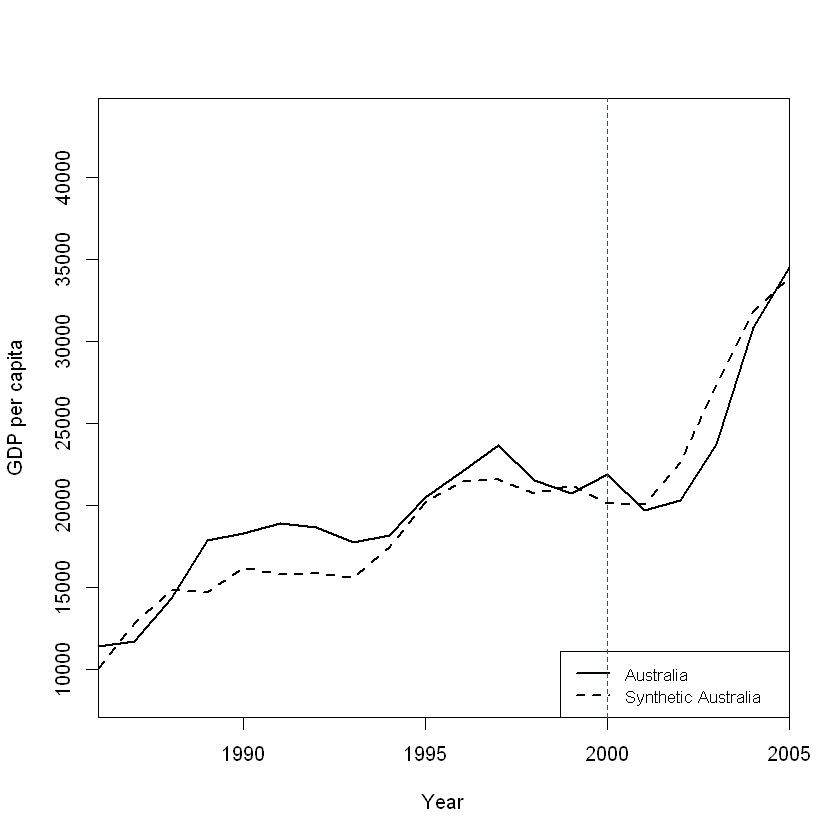

In [42]:
path.plot(synth.res = synth.out,
        dataprep.res = dataprep.out,
        Ylab = "GDP per capita",
        Xlab = "Year",
        Legend = c("Australia", "Synthetic Australia"),
        Legend.position = "bottomright"
)

abline(v = 2000, lty = 2, col = "red")

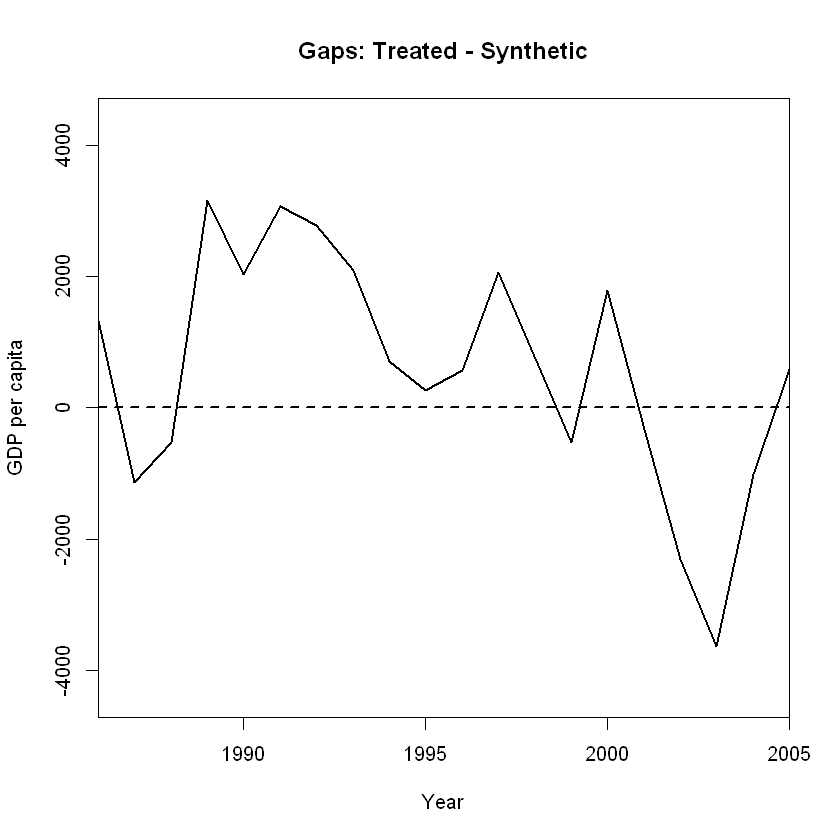

In [43]:
gaps.plot(synth.res = synth.out,
        dataprep.res = dataprep.out,
        Ylab = "GDP per capita",
        Xlab = "Year"
        )

In [44]:
synth.tables$tab.v

,v.weights
million_population,0.074
cpi,0.068
exchange_rate,0.014
land_area,0
tourism_expenditure,0.363
exports_percentage,0
labor_force,0.004
national_expenditure,0.333
capital_formulation,0.084
adj_national_income,0.001


In [45]:
gaps <- (dataprep.out$Y1plot - (dataprep.out$Y0plot%*%synth.out$solution.w))
gaps[15:20]

[1]  1787.7306  -329.0129 -2309.3279 -3630.0956 -1012.5585   581.6104


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 8104139 

solution.v:
 0.05882566 0.05160547 0.05621026 0.2156772 0.1717481 0.05694282 0.02818695 0.0008270135 0.0001857697 0.1395072 0.02692375 0.1170095 0.07635038 

solution.w:
 0.139137 8.262e-07 0.3029035 2.8305e-06 0.0001008829 1.3745e-06 1.2762e-06 0.1167047 8.857e-07 1.0861e-06 0.4181999 0.02294569 



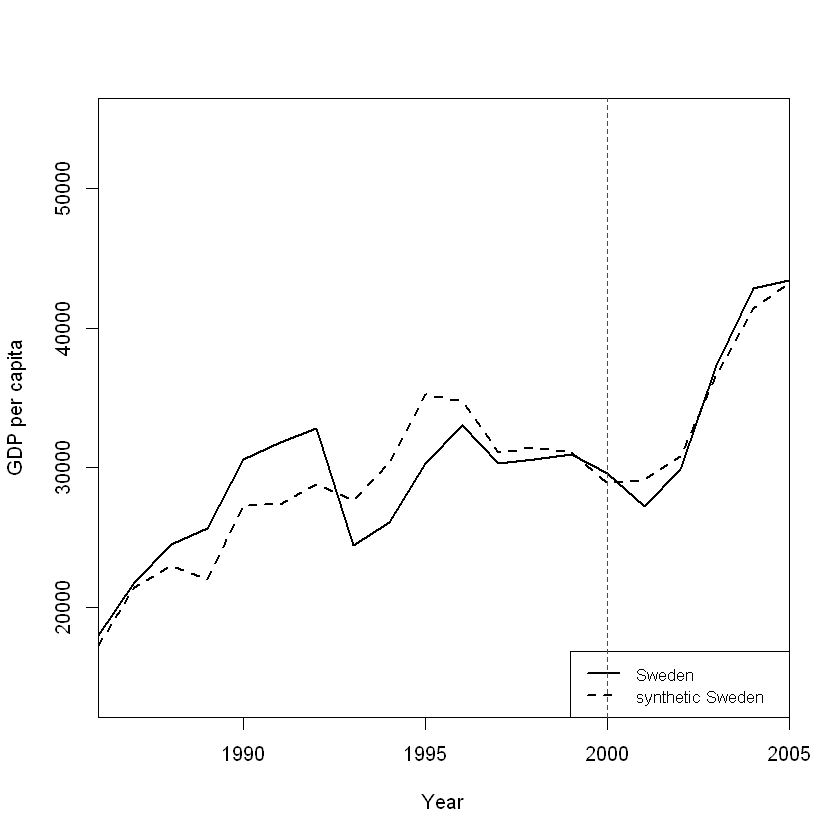

In [46]:
# In place placebo
treated_unit <- "Sweden"
control_units <- c("Argentina","Brazil", "Denmark", "Japan", "Korea", "Malaysia",  "Mexico", "New Zealand", "Singapore","South Africa", "Switzerland", "United Kingdom")
dataprep.out.sweden <-
    dataprep(foo = data,
             predictors = c("million_population", "cpi", "exchange_rate",
                            "land_area", "tourism_expenditure", "exports_percentage", "labor_force", 
                            "national_expenditure", "capital_formulation", 
                            "adj_national_income", "trade_percentage", "unemployment", "urban_pop") ,
             predictors.op = "mean" ,
             time.predictors.prior = 1986:2000 ,
             dependent = "gdp_per_capita",
             unit.variable = "id",
             unit.names.variable = "country",
             time.variable = "year",
             treatment.identifier = treated_unit,
             controls.identifier = control_units,
             time.optimize.ssr = 1986:2000,
             time.plot = 1986:2005
    )
synth.out.sweden <- synth(data.prep.obj = dataprep.out.sweden)
path.plot(synth.res = synth.out.sweden,
          dataprep.res = dataprep.out.sweden,
          Ylab = "GDP per capita",
          Xlab = "Year",
          Legend = c("Sweden","synthetic Sweden"),
          Legend.position = "bottomright"
)
# Add line for year = 2000 in the plot
abline(v = 2000, lty = 2, col = "red")


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 1105618 

solution.v:
 0.0002838745 0.01261538 9.72029e-05 2.97127e-05 0.6903797 0.005303075 2.9044e-05 0.09848844 0.003018549 0.0003204612 0.00911728 0.1570046 0.0233127 

solution.w:
 0.002019083 0.003213614 0.002879625 0.002595317 0.08692134 5.4228e-06 0.009729052 0.128176 0.001452204 0.1614679 0.3312425 0.001253788 0.2690441 



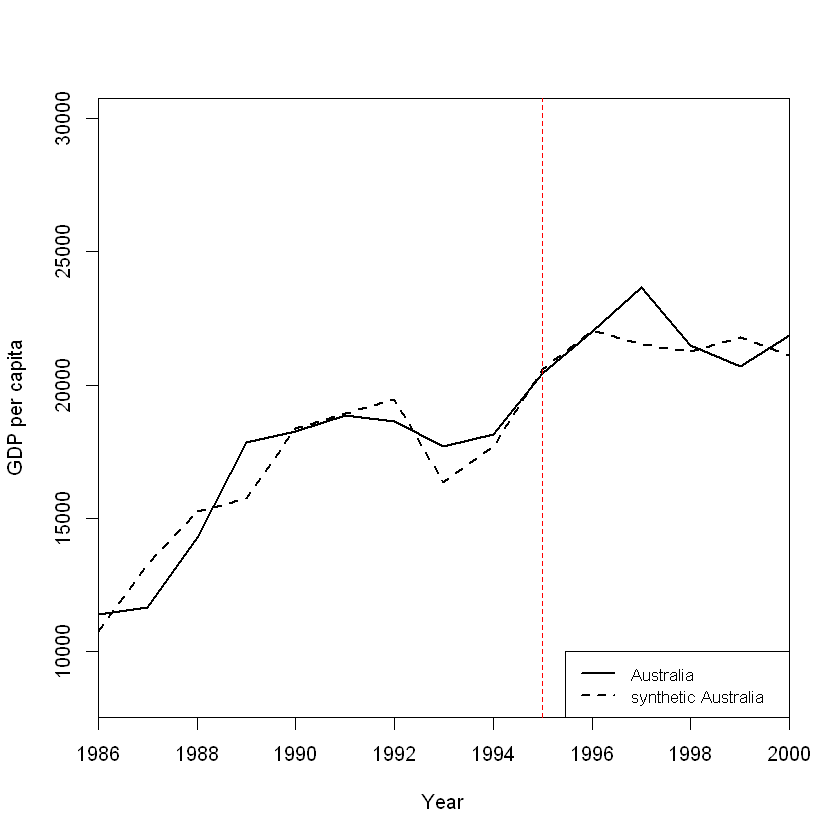

In [47]:
# In time placebo
treated_unit <- "Australia"
control_units <- c("Argentina","Brazil", "Denmark", "Japan", "Korea", "Malaysia",  "Mexico", "New Zealand", "Singapore", "South Africa", "Sweden", "Switzerland", "United Kingdom")
dataprep.out.1995 <-
    dataprep(foo = data,
             predictors = c("million_population", "cpi", "exchange_rate",
                            "land_area", "tourism_expenditure", "exports_percentage", "labor_force", 
                            "national_expenditure", "capital_formulation", 
                            "adj_national_income", "trade_percentage", "unemployment", "urban_pop") ,
             predictors.op = "mean" ,
             time.predictors.prior = 1986:1995 ,
             dependent = "gdp_per_capita",
             unit.variable = "id",
             unit.names.variable = "country",
             time.variable = "year",
             treatment.identifier = treated_unit,
             controls.identifier = control_units,
             time.optimize.ssr = 1986:1995,
             time.plot = 1986:2000
    )
synth.out.1995 <- synth(data.prep.obj = dataprep.out.1995)
path.plot(synth.res = synth.out.1995,
          dataprep.res = dataprep.out.1995,
          Ylab = "GDP per capita",
          Xlab = "Year",
          Legend = c("Australia","synthetic Australia"),
          Legend.position = "bottomright"
)
# Add line for year = 2000 in the plot
abline(v = 1995, lty = 2, col = "red")